In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Q1

## Read 1.jpg image

In [3]:
img = cv2.imread("./images/1.jpg")

## Q1.1: RGB to CMYK & CMYK to RGB

In [4]:
def RGB_to_CMYK(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):
  r_ = r / RGB_SCALE
  g_ = g / RGB_SCALE
  b_ = b / RGB_SCALE
  k = np.ones(r.shape)
  for i in range(g.shape[0]):
    for j in range(g.shape[1]):
      k[i,j] -= np.max((r_[i][j], g_[i][j], b_[i][j]))
  c = ((1 - r_ - k) / (1 - k)) * CMYK_SCALE
  m = ((1 - g_ - k) / (1 - k)) * CMYK_SCALE
  y = ((1 - b_ - k) / (1 - k)) * CMYK_SCALE
  # print(type(c), type(k), c.shape, k.shape)
  return c, m, y, k

In [5]:
def CMYK_to_RGB(c, m, y, k, RGB_SCALE=255, CMYK_SCALE=100):
    r_ = 1 - k - c / CMYK_SCALE
    g_ = 1 - k - m / CMYK_SCALE
    b_ = 1 - k - y / CMYK_SCALE
    
    # valid range [0, 1]
    r_ = np.clip(r_, 0, 1)
    g_ = np.clip(g_, 0, 1)
    b_ = np.clip(b_, 0, 1)
    
    # Scale to RGB range and convert to integer
    r = (r_ * RGB_SCALE).astype(np.uint8)
    g = (g_ * RGB_SCALE).astype(np.uint8)
    b = (b_ * RGB_SCALE).astype(np.uint8)
    
    return r, g, b



## Q1.2: RGB to HSI

In [6]:
def RGB_to_HSI(r, g, b):
  # Normalize RGB values
  r_norm = r / 255
  g_norm = g / 255
  b_norm = b / 255

  # Calculate intensity
  i = (r_norm + g_norm + b_norm) / 3

  # Calculate saturation
  min_rgb = np.minimum(r_norm, np.minimum(g_norm, b_norm))
  s = 1 - 3 * min_rgb / (r_norm + g_norm + b_norm)

  # Calculate hue
  num = 0.5 * ((r_norm - g_norm) + (r_norm - b_norm))
  den = np.sqrt((r_norm - g_norm) ** 2 + (r_norm - b_norm) * (g_norm - b_norm))
  h = np.arccos(num / (den + 1e-10))  # Add a small value to avoid division by zero
  h = np.degrees(h)

  # Adjust hue based on the value of blue component
  h[b_norm > g_norm] = 360 - h[b_norm > g_norm]

  return h, s, i

## Show result image for all functions

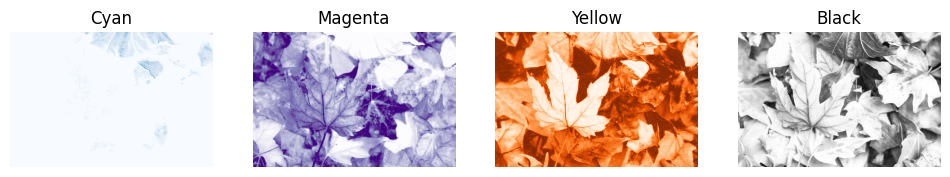

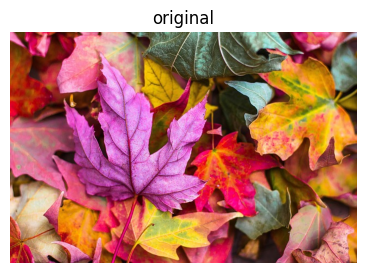

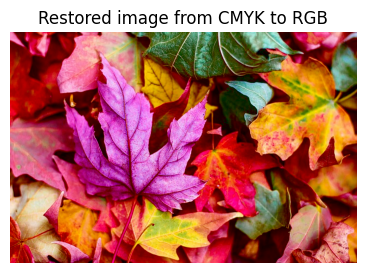

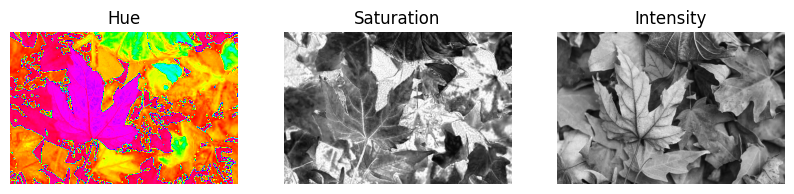

In [7]:
# RGB to CMYK
r, g, b = (img[:,:,2], img[:,:,1], img[:,:,0])
c, m, y, k = RGB_to_CMYK(r, g, b)

# Define colormaps for CMYK components
cmap_cyan = cm.Blues
cmap_magenta = cm.Purples
cmap_yellow = cm.Oranges
cmap_black = cm.Greys

# Plot each CMYK component separately
plt.figure(figsize=(12, 3))

# Cyan component
plt.subplot(1, 4, 1)
plt.imshow(c, cmap=cmap_cyan)
plt.title('Cyan')
plt.axis('off')

# Magenta component
plt.subplot(1, 4, 2)
plt.imshow(m, cmap=cmap_magenta)
plt.title('Magenta')
plt.axis('off')

# Yellow component
plt.subplot(1, 4, 3)
plt.imshow(y, cmap=cmap_yellow)
plt.title('Yellow')
plt.axis('off')

# Black component
plt.subplot(1, 4, 4)
plt.imshow(k, cmap=cmap_black)
plt.title('Black')
plt.axis('off')
plt.show()


# Original and Restored img
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')
plt.show()


# Restore rgb values from the cmyk values and meging them
plt.figure(figsize=(12, 3))
r_, g_, b_ = CMYK_to_RGB(c, m ,y , k)
plt.subplot(1, 2, 2)
plt.imshow(cv2.merge([r_,g_,b_]))
plt.title('Restored image from CMYK to RGB')
plt.axis('off')
plt.show()


# RGB to HSI
h, s, i = RGB_to_HSI(img[:,:,2], img[:,:,1], img[:,:,0])
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')
plt.title('Hue')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(i, cmap='gray')
plt.title('Intensity')
plt.axis('off')

plt.show()

# Q2

## Read images

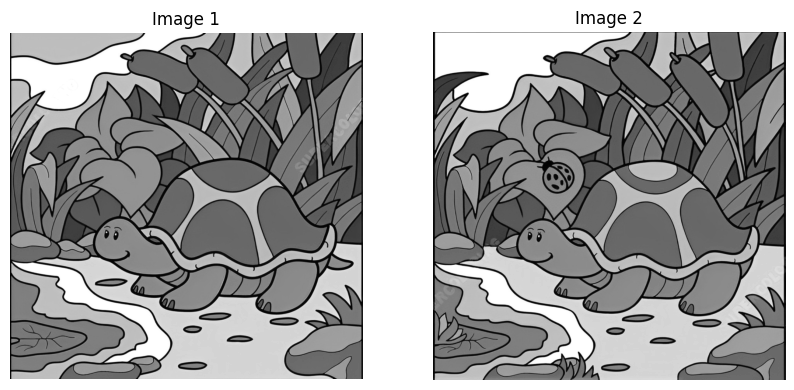

In [8]:
# Read the grayscale images
img1 = cv2.imread("./images/2.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("./images/3.jpg", cv2.IMREAD_GRAYSCALE)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.show()

## Find differences between two pictures

In [9]:
def diff(image1, image2):
    # Convert images to the same depth (if necessary)
    image1 = cv2.convertScaleAbs(image1)
    image2 = cv2.convertScaleAbs(image2)
    
    # Resize images if they have different dimensions
    if image1.shape != image2.shape:
        image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
    
    # Create an empty image with the same size as the input images
    result = np.zeros((image1.shape[0], image1.shape[1], 3), dtype=np.uint8)
    
    # Assign blue channel from image1
    result[:,:,0] = image1
    
    # Assign green and red channels from image2
    result[:,:,1] = image2
    result[:,:,2] = image2
    
    return result

## Show result

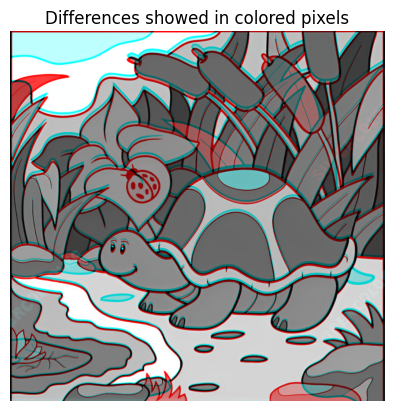

In [10]:
res = diff(img1, img2)
# Save the image
cv2.imwrite("./images/differences.jpeg", cv2.cvtColor(res, cv2.COLOR_RGB2BGR))

# Display the result
plt.imshow(res)
plt.title("Differences showed in colored pixels")
plt.axis('off')
plt.show()